# Clustering

Rionaldi Chandraseta - 13515077

## Functions

### Visualize Data

In [1]:
import matplotlib.pyplot as plt
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def visualize_iris_3d(df_X, labels):
    coms = combinations([0,1,2,3], 3)
    elevation = [10, 10, 10, 10]
    azimuth = [45, 45, 45, 45]
    
    fig = plt.figure(figsize=(15,10))
    for idx, com in enumerate(coms):
        ax = fig.add_subplot(2, 2, (idx+1), projection='3d')
        ax.scatter3D(df_X.values[:, com[0]], df_X.values[:, com[1]], df_X.values[:, com[2]], c=labels, cmap='copper')
        ax.set_xlabel(df_X.columns[com[0]])
        ax.set_ylabel(df_X.columns[com[1]])
        ax.set_zlabel(df_X.columns[com[2]])
        ax.view_init(elevation[idx], azimuth[idx])
    plt.show()

### Evaluate Clustering

In [2]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import v_measure_score

def evaluate_clustering_predictions(labels, predictions):
    print("Adjusted Random Score: {}".format(adjusted_rand_score(labels, predictions)))
    print("V-Measure: {}".format(v_measure_score(labels, predictions)))

### Save/Load Model

In [3]:
import dill

def save_model(model, filename):
    filepath = '../model/' + filename + '.mdl'
    dill.dump(model, open(filepath, 'wb'))

def load_model(filename):
    filepath = '../model/' + filename + '.mdl'
    return dill.load(open(filepath, 'rb'))

### Generate Instance

In [30]:
def generate_instance(n_instances, instance_class='', auto=True):
    possible_instance_class = ['setosa', 'versicolor', 'virginica']
    new_instances = []
    
    if auto:
        if instance_class.lower() in possible_instance_class:
            print('Generating {} iris {} instance(s)'.format(n_instance, instance_class.lower()))
            
            if instance_class.lower() == 'setosa':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                setosa_means = [5.0060, 3.4180, 1.4640, 0.2440]
                setosa_stds = [0.3489, 0.3772, 0.1718, 0.1061]
                
                col1 = np.random.normal(setosa_means[0], setosa_stds[0], n_instances)
                col2 = np.random.normal(setosa_means[1], setosa_stds[1], n_instances)
                col3 = np.random.normal(setosa_means[2], setosa_stds[2], n_instances)
                col4 = np.random.normal(setosa_means[3], setosa_stds[3], n_instances)
                
            elif instance_class.lower() == 'versicolor':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                versicolor_means = [5.9360, 2.7700, 4.2600, 1.3260]
                versicolor_stds = [0.5110, 0.3106, 0.4652, 0.1958]
                
                col1 = np.random.normal(versicolor_means[0], versicolor_stds[0], n_instances)
                col2 = np.random.normal(versicolor_means[1], versicolor_stds[1], n_instances)
                col3 = np.random.normal(versicolor_means[2], versicolor_stds[2], n_instances)
                col4 = np.random.normal(versicolor_means[3], versicolor_stds[3], n_instances)
                
            elif instance_class.lower() == 'virginica':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                virginica_means = [6.5880, 2.9740, 5.5520, 2.0260]
                virginica_stds = [0.6295, 0.3193, 0.5463, 0.2719]
                
                col1 = np.random.normal(virginica_means[0], virginica_stds[0], n_instances)
                col2 = np.random.normal(virginica_means[1], virginica_stds[1], n_instances)
                col3 = np.random.normal(virginica_means[2], virginica_stds[2], n_instances)
                col4 = np.random.normal(virginica_means[3], virginica_stds[3], n_instances)
            
            for n in range(n_instances):
                new_instance = np.zeros(4)
                
                # TODO: Check if input is number
                new_instance[0] = col1[n]
                new_instance[1] = col2[n]
                new_instance[2] = col3[n]
                new_instance[3] = col4[n]
                new_instances.append(new_instance)
        else:
            print('Unsupported instance class')
            # Raise Exception
    else:
        for n in range(n_instances):
            new_instance = np.zeros(4) # From the number of attribute in Iris dataset
            print("Instance {}".format(n))
            
            # TODO: Check if input is number
            new_instance[0] = input("Sepal length (cm): ")
            new_instance[1] = input("Sepal width (cm): ")
            new_instance[2] = input("Petal length (cm): ")
            new_instance[3] = input("Petal width (cm): ")
            new_instances.append(new_instance)
        
    return new_instances

In [24]:
generate_instance('', 10)

yeah


## Read Dataset

### Iris

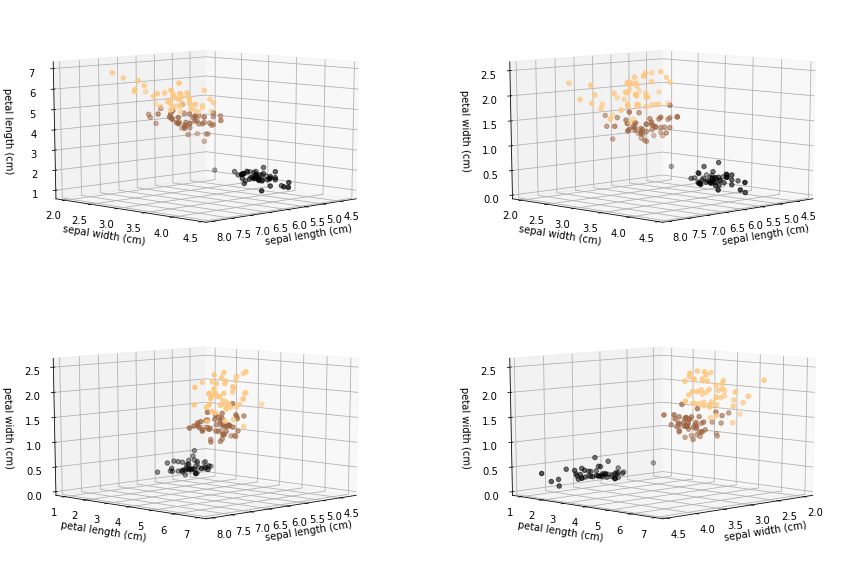

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets

iris_dataset = datasets.load_iris()
iris_dataframe = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                              columns=iris_dataset['feature_names'] + ['target'])

iris_X = iris_dataframe.iloc[:, 0:4]
iris_y = iris_dataframe.iloc[:, 4:]

visualize_iris_3d(iris_X, iris_dataframe.target)

### Play Tennis

In [5]:
play_tennis_dataframe = pd.read_csv('../data/play_tennis.csv', sep=',')

pt_X = play_tennis_dataframe.iloc[:, 0:4]
pt_y = play_tennis_dataframe.iloc[:, 4:]

play_tennis_dataframe

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,norml,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## K-Means

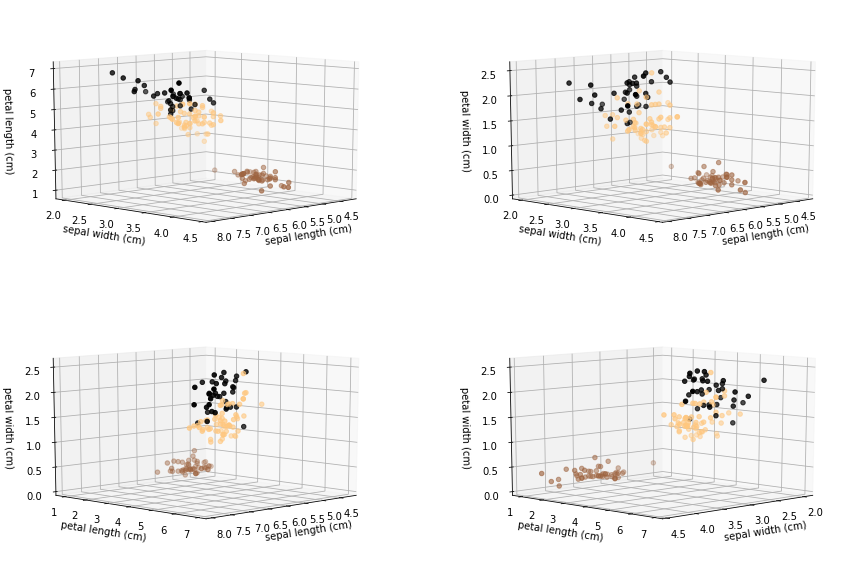

Adjusted Random Score: 0.7302382722834697
V-Measure: 0.7581756800057784


In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(iris_X)

visualize_iris_3d(iris_X, k_means.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), k_means.labels_)

Parameter yang bisa digunakan oleh KMeans:
- **n_clusters**: menentukan jumlah _cluster_ dan centroid yang dihasilkan oleh model
- **init**: menentukan metode untuk inisialisasi
- **n_init**: menentukan jumlah berapa kali algoritma K-Means akan dijalankan dengan _seed_ centroid berbeda
- **max_iter**: menentukan jumlah iterasi maksimal setiap kali menjalankan algoritma K-Means
- **tol**: menentukan toleransi relatif terhadap inertia untuk menentukan apakah sudah konvergen
- **precompute_distances**: menentukan apakah dilakukan penghitungan jarak setiap sampel dengan setiap _cluster_ di awal
- **verbose**: menentukan seberapa banyak informasi log yang ditampilkan
- **random_state**: menentukan _seed_ bagi RNG
- **copy_x**: menentukan apakah data original dicopy terlebih dahulu sebelum diproses agar tidak berubah
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan
- **algorithm**: menentukan algoritma K-Means yang digunakan, terdapat pilihan "full" atau "elkan"

## Agglomerative Clustering

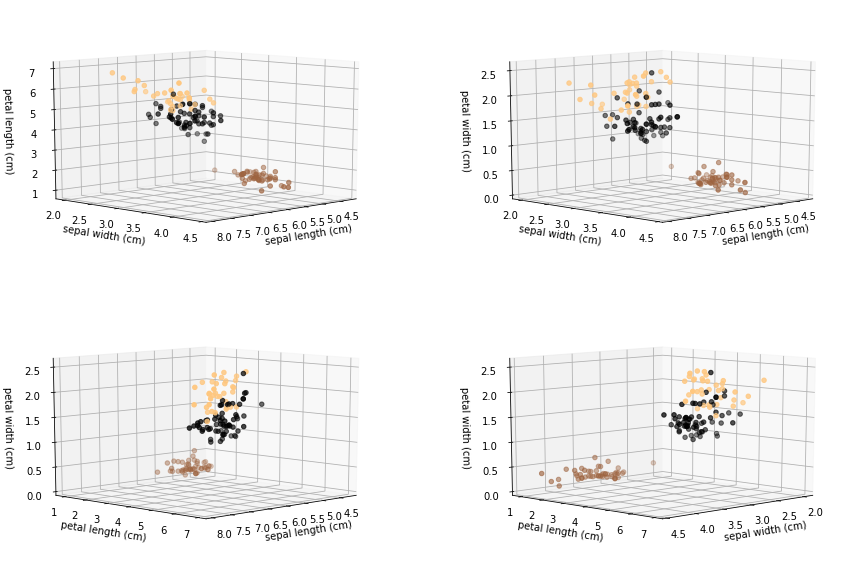

Adjusted Random Score: 0.7311985567707745
V-Measure: 0.7700836616487869


In [7]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_X)

visualize_iris_3d(iris_X, agg_clustering.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), agg_clustering.labels_)

Parameter yang bisa digunakan oleh Agglomerative Clustering:
- **n_clusters**: menentukan jumlah _cluster_ yang dihasilkan
- **affinity**: menentukan metrik yang digunakan untuk menghitung _linkage_ antar data
- **memory**: menentukan direktori yang digunakan untuk _caching_. Jika None, maka tidak akan dilakukan _caching_
- **connectivity**: menentukan matriks konektifitas dari data. Jika None, maka data dianggap tidak terstruktur
- **compute_full_tree**: hanya berguna jika matriks konektifitas ditentukan. Menentukan apakah pembangkitan pohon berhenti setelah n_clusters
- **linkage**: menentukan _linkage criterion_ yang digunakan, yaitu jarak dari data yang dilakukan _clustering_
- **pooling_func**: menentukan nilai dari fitur yang telah digabungkan pada satu _cluster_

## DBSCAN

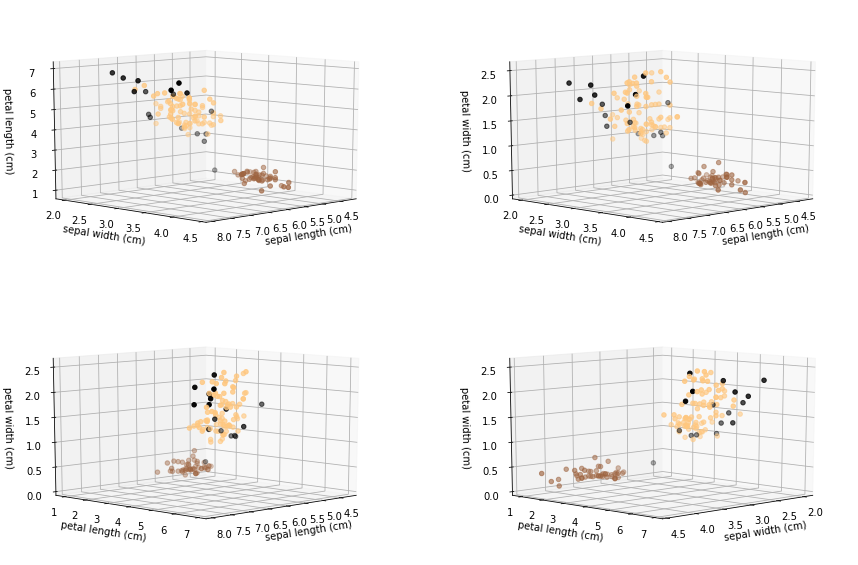

Adjusted Random Score: 0.5206185241703302
V-Measure: 0.6044156375501386


In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(iris_X)

visualize_iris_3d(iris_X, dbscan.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), dbscan.labels_)

Parameter yang bisa digunakan oleh DBSCAN:
- **eps**: menentukan jarak maksimum antara dua data agar dianggap sebagai tetangga
- **min_samples**: menentukan jumlah data bertetangga minimum agar sebuah data dianggap sebagai _core point_
- **metric**: menentukan metrik yang digunakan untuk menghitung jarak antar data
- **metric_params**: parameter tambahan untuk fungsi metrik
- **algorithm**: menentukan algoritma yang digunakan oleh modul NearestNeighbors untuk menentukan jarak dan mencari tetangga terdekat
- **leaf_size**: hanya digunakan jika algoritma='ball_tree' atau 'kd_tree'. Menentukan jumlah daun yang dibangkitkan
- **p**: menentukan _power_ dari metrik Minkowski yang digunakan untuk menghitung jarak antar titik
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan

## Gaussian Mixtures

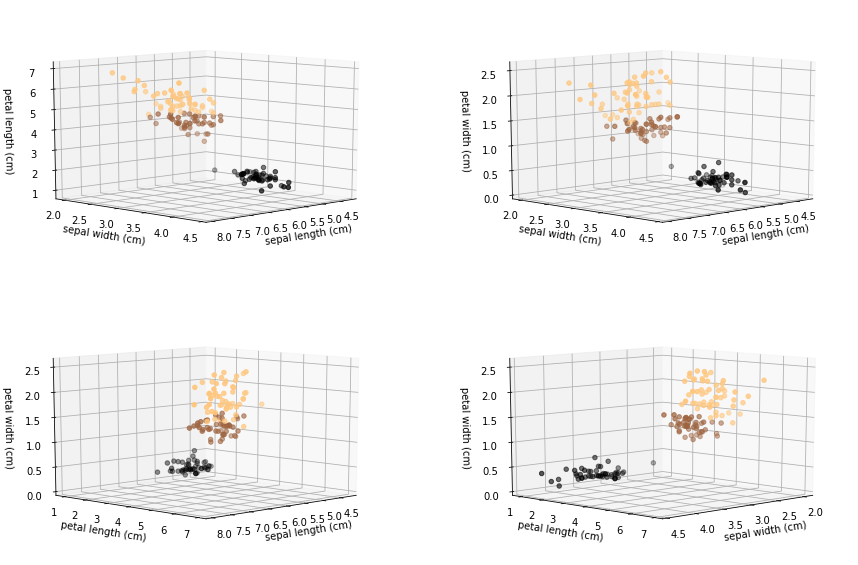

Adjusted Random Score: 0.9038742317748124
V-Measure: 0.8996935451597475


In [10]:
from sklearn.mixture import GaussianMixture

gauss_mix = GaussianMixture(n_components=3)
gauss_mix.fit(iris_X)

gauss_labels = gauss_mix.predict(iris_X)

visualize_iris_3d(iris_X, gauss_labels)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), gauss_labels)

Parameter yang bisa digunakan oleh Gaussian Mixture:
- **n_components**: menentukan jumlah dari komponen _mixture_ (_cluster_)
- **covariance_type**: menentukan parameter kovarians yang digunakan
- **tol**: menentukan _threshold_ untuk konvergen
- **reg_covar**: regularisasi non-negatif yang digunakan untuk memastikan matriks kovarians bernilai positif
- **max_iter**: menentukan jumlah iterasi EM yang dilakukan
- **n_init**: menentukan jumlah inisialisasi yang dilakukan, hasil terbaik yang akah disimpan
- **init_params**: menentukan metode untuk menginisialisasi berat, _means_, dan _precisions_
- **weights_init**: menentukan berat awal secara manual. Jika None, penentuan berat awal akan dilakukan dengan metode pada init_params
- **means_init**: menentukan _means_ awal secara manual. Jika None, penentuan _means_ awal akan dilakukan dengan metode pada init_params
- **precisions_init**: menentukan _precisions_ awal secara manual. Jika None, maka penentuan _precisions_ awal akan dilakukan dengan metode pada init_params
- **random_state**: menentukan _seed_ bagi RNG
- **warm_start**: menentukan apakah solusi dari pemanggilan fit akan digunakan dalam pemanggilan fit setelahnya
- **verbose**: menentukan seberapa banyak informasi log yang ditampilkan
- **verbose_interval**: menentukan berapa banyak iterasi yang dilakukan sebelum menampilkan informasi log

## K-Medoids 

Menggunakan library [pyclustering](https://pypi.org/project/pyclustering/)

[[112, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [7, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [78, 0, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149]]


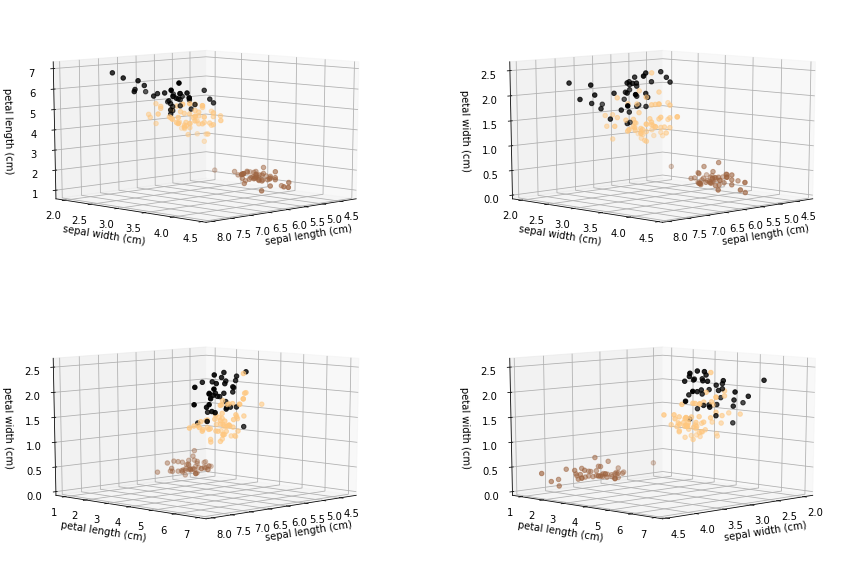

Adjusted Random Score: 0.7082194380402878
V-Measure: 0.727255947115382


In [58]:
from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = [0, 75, 149]
k_medoids = kmedoids(iris_X.values, initial_medoids)
k_medoids.process()

k_medoids_clusters = k_medoids.get_clusters()

k_medoids_labels = [0] * len(iris_y)

# Convert the result from .get_clusters() to labels for visualization
for label, cluster in enumerate(k_medoids_clusters):
    for index in cluster:
        k_medoids_labels[index] = label
        
visualize_iris_3d(iris_X, k_medoids_labels)


evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), k_medoids_labels)

Parameter yang bisa digunakan oleh K-Medoids:
- **data**:
- **initial_index_medoids**:
- **tolerance**:
- **ccore**:

## Graph-Based Clustering

Menggunakan library [mst_clustering](https://pypi.org/project/mst_clustering/)

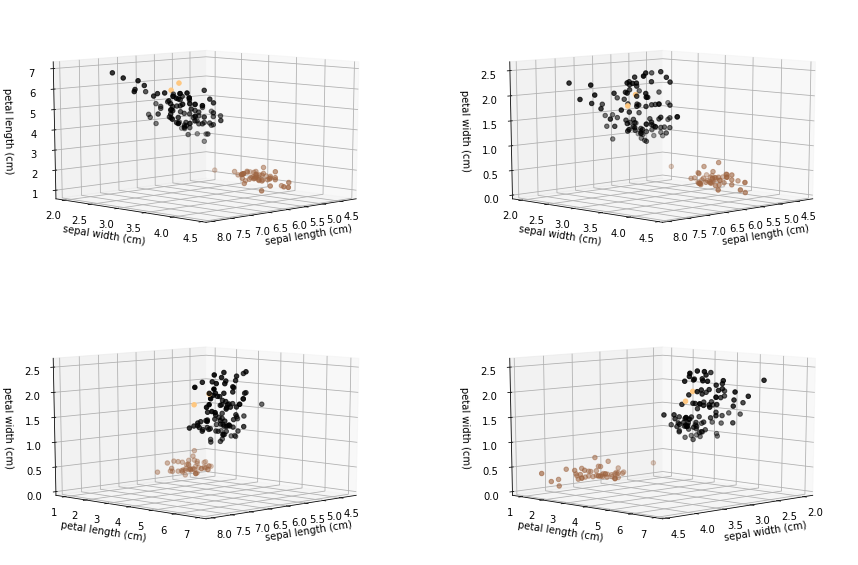

Adjusted Random Score: 0.539408633653917
V-Measure: 0.6777946090298759


In [52]:
from mst_clustering import MSTClustering

graph_clustering = MSTClustering(cutoff=2)
graph_clustering_labels = graph_clustering.fit_predict(iris_X)

visualize_iris_3d(iris_X, graph_clustering_labels)


evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), graph_clustering_labels)

Parameter yang bisa digunakan oleh mst_clustering:
- **cutoff**: 
- **cutoff_scale**: 
- **min_cluster_size**: 
- **approximate**: 
- **n_neighbors**: 
- **metric**: 
- **metric_params**: 

## Grid Clustering

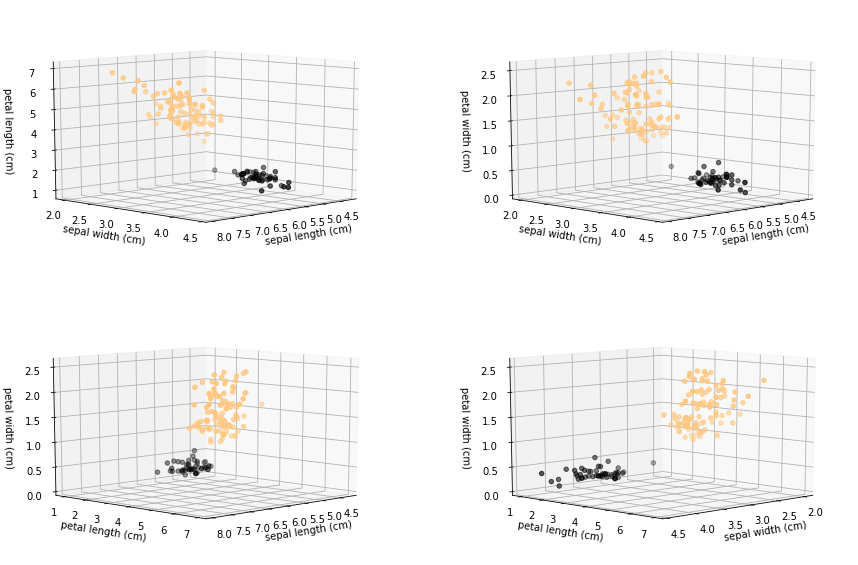

Adjusted Random Score: 0.5437515388376617
V-Measure: 0.6924541904553438


In [95]:
from pyclustering.cluster.bang import bang

grid_clustering = bang(iris_X.values.tolist(), levels=13)
grid_clustering.process()

grid_clustering_clusters = grid_clustering.get_clusters()

grid_clustering_labels = [0] * len(iris_y)

# Convert the result from .get_clusters() to labels for visualization
for label, cluster in enumerate(grid_clustering_clusters):
    for index in cluster:
        grid_clustering_labels[index] = label

visualize_iris_3d(iris_X, grid_clustering_labels)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), grid_clustering_labels)

Untuk algoritma ini, nilai yang dihasilkan oleh _adjusted random score_ dan _v-measure_ rendah karena jumlah _cluster_ yang dihasilkan hanya 2. Hasil ini dicapai ketika nilai `levels=13`. Ketika nilai levels diset 14, jumlah _cluster_ yang dihasilkan adalah 4, sehingga dipilih untuk tetap menggunakan 13 sebagai nilai levels

Parameter yang bisa digunakan oleh bang:
- **data**: data input yang akan diproses dengan algoritma _clustering_
- **levels**: jumlah tingkatan pada pohon yang digunakan untuk melakukan _splitting_
- **ccore**: belum diimplementasikan untuk saat ini
- **kwargs**: _keyword_ argumen tambahan, _optional_

## Save/Load Model

In [13]:
save_model(k_means, 'k_means')
save_model(agg_clustering, 'agglomerative_clustering')
save_model(dbscan, 'dbscan')
save_model(gauss_mix, 'gaussian_mixtures')
save_model(k_medoids, 'k_medoids')
save_model(graph_clustering, 'graph_based_clustering')

## Analyzing Data Distribution to Generate New Instance

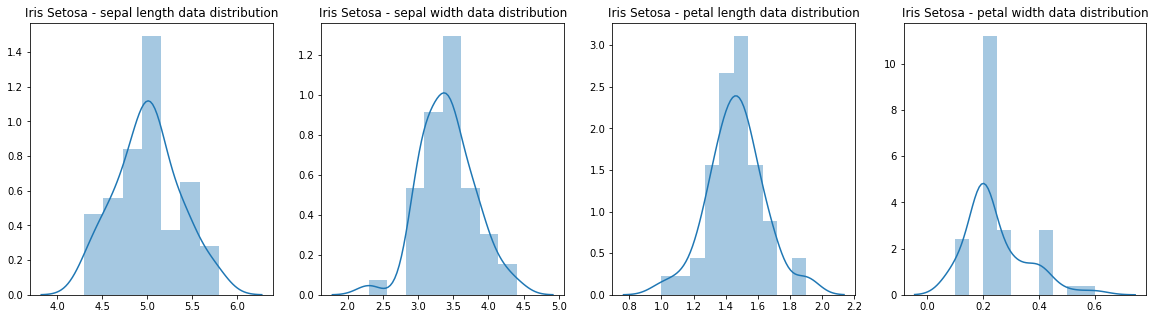

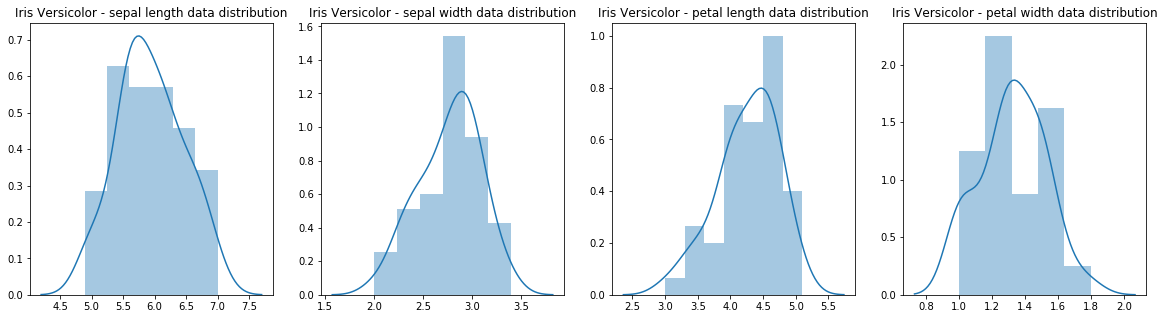

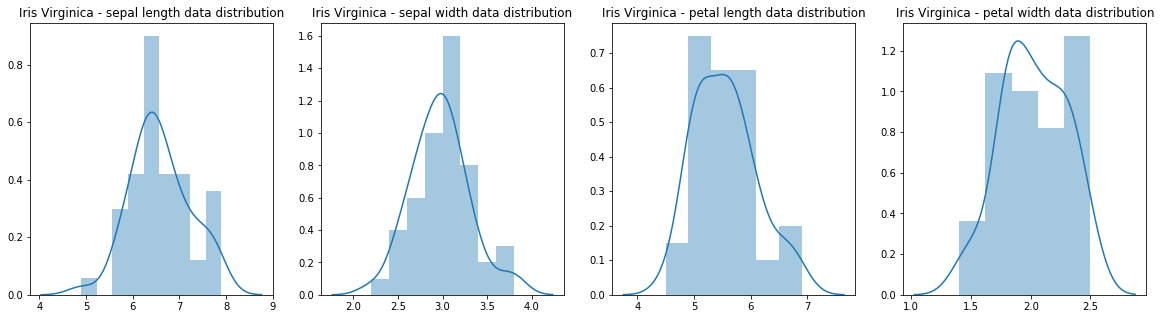

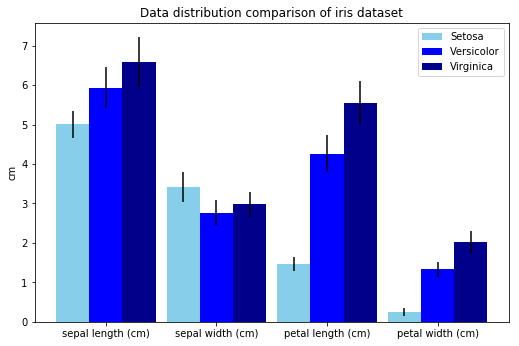

In [14]:
import seaborn as sns

iris_setosa = iris_dataframe[(iris_dataframe.target == 0)].iloc[:, 0:4]
iris_versicolor = iris_dataframe[(iris_dataframe.target == 1)].iloc[:, 0:4]
iris_virginica = iris_dataframe[(iris_dataframe.target == 2)].iloc[:, 0:4]

iris_setosa_means = [0, 0, 0, 0]
iris_setosa_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_setosa_means[idx] = np.mean(iris_setosa[column].values)
    iris_setosa_stds[idx] = np.std(iris_setosa[column].values)

iris_versicolor_means = [0, 0, 0, 0]
iris_versicolor_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_versicolor):
    iris_versicolor_means[idx] = np.mean(iris_versicolor[column].values)
    iris_versicolor_stds[idx] = np.std(iris_versicolor[column].values)

iris_virginica_means = [0, 0, 0, 0]
iris_virginica_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_virginica_means[idx] = np.mean(iris_virginica[column].values)
    iris_virginica_stds[idx] = np.std(iris_virginica[column].values)

# Display data distribution of Iris Setosa
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_setosa):
    ax[idx].set_title('Iris Setosa - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_setosa[column].values, ax=ax[idx])

# Display data distribution of Iris Versicolor
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_versicolor):
    ax[idx].set_title('Iris Versicolor - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_versicolor[column].values, ax=ax[idx])
    
# Display data distribution of Iris Virginica
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_virginica):
    ax[idx].set_title('Iris Virginica - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_virginica[column].values, ax=ax[idx])

    
# Display the means and stds difference
indices = np.arange(len(iris_setosa_means))
bar_width = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 5.5)
bar1_setosa = ax.bar(indices - bar_width, iris_setosa_means, bar_width, yerr=iris_setosa_stds,
                     color='SkyBlue', label='Setosa')
bar2_versicolor = ax.bar(indices, iris_versicolor_means, bar_width, yerr=iris_versicolor_stds,
                     color='Blue', label='Versicolor')
bar3_virginica = ax.bar(indices + bar_width, iris_virginica_means, bar_width, yerr=iris_virginica_stds,
                     color='DarkBlue', label='Virginica')
ax.set_title('Data distribution comparison of iris dataset')
ax.set_ylabel('cm')
ax.set_xticks(indices)
ax.set_xticklabels(iris_setosa.columns.tolist())
ax.legend()

plt.show()

From the data distribution graphs above, we can conclude that the data distribution is nearing Normal distribution. Therefore, we could generate new data by drawing from normal distribution using the following means and standard deviations.

In [15]:
print("Setosa - means: {} - stds: {}".format(['%.4f' % x for x in iris_setosa_means],['%.4f' % x for x in iris_setosa_stds]))
print("Versicolor - means: {} - stds: {}".format(['%.4f' % x for x in iris_versicolor_means],['%.4f' % x for x in iris_versicolor_stds]))
print("Virginica - means: {} - stds: {}".format(['%.4f' % x for x in iris_virginica_means],['%.4f' % x for x in iris_virginica_stds]))

Setosa - means: ['5.0060', '3.4180', '1.4640', '0.2440'] - stds: ['0.3489', '0.3772', '0.1718', '0.1061']
Versicolor - means: ['5.9360', '2.7700', '4.2600', '1.3260'] - stds: ['0.5110', '0.3106', '0.4652', '0.1958']
Virginica - means: ['6.5880', '2.9740', '5.5520', '2.0260'] - stds: ['0.6295', '0.3193', '0.5463', '0.2719']


## TODO

- Grid Based Clustering (Pyclustering - Bang)
- Generate new data by using the same data distribution + epsilon
- Classify new data, plot